# Imports

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy
from tqdm.notebook import tqdm

In [68]:
from google.colab import drive
drive.mount('/content/drive')
ruta = "/content/drive/MyDrive/Colab Notebooks/TFG TLOU Reviews/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
user_reviews_g2 = pd.read_csv(ruta+"user_reviews_g2.csv")

In [70]:
user_reviews_g2.head()

,id,review,type_review,date,language,views,votes,score
0,Maksim_ON,"Продовження культової серії, було зіпсоване че...",expanded,2021-03-17,Ukrainian,2,2,2
1,Araset,"Well, it's most definetly sheeet and peess and...",expanded,2021-03-16,English,2,2,1
2,realistyalanci,"Pathetic.,Disappointment. Inconsistency.,Cring...",expanded,2021-03-16,English,3,3,0
3,Cliente,A maior traição que eu já vi na minha vida do ...,normal,2021-03-15,Portuguese,3,3,0
4,wingZero21,I really enjoyed the first game. It was a 10/1...,normal,2021-03-14,English,2,2,6


In [71]:
not_english_reviews = user_reviews_g2[user_reviews_g2['language'] != 'English']
not_english_reviews.shape

(6456, 8)

In [72]:
not_english_reviews.sample(15)

,id,review,type_review,date,language,views,votes,score
3909,Skyber,Отвратительный сюжет. И задрала уже повестка. ...,expanded,2020-07-25,Russian,6,2,3
5619,LauAlva02,"Un juego que amarás u odiarás, así de simple. ...",normal,2020-07-16,Spanish,4,2,10
12024,Xliol,"Es un buen juego, no es para que tenga tan mal...",normal,2020-07-01,Spanish,1,1,8
21282,charliecopper,Empezaré diciendo que esta secuela no es de 10...,normal,2020-06-22,Spanish,3,1,10
6880,EmanuRey,El juego me parece brutal en términos de gráfi...,normal,2020-07-11,Spanish,3,2,8
4847,JeanVarioZecter,qualidades : jogabilidade impressionante e gam...,normal,2020-07-20,Portuguese,1,1,8
6823,Rode_games,"The last of us part 2,Como experiencia persona...",normal,2020-07-11,Spanish,5,4,9
16720,robert15,"para mi este juego esta bueno, no me gusta com...",normal,2020-06-26,Spanish,3,1,0
17947,granmaxpro,"Altamente recomendado, con mecánicas de juego ...",expanded,2020-06-24,Spanish,1,1,10
900,khvatid,Игра очень крутая. Первую половину игры желаеш...,normal,2020-10-27,Russian,3,2,10


In [73]:
not_english_reviews['language'].unique()

array(['Ukrainian', 'Portuguese', 'Russian', 'Croatian', 'Spanish',
       'Norwegian', 'Somali', 'Not identified', 'Turkish', 'Italian',
       'French', 'Estonian', 'Afrikaans', 'Dutch', 'Slovenian', 'Tagalog',
       'Korean', 'Bulgarian', 'Polish', 'Lithuanian', 'Albanian',
       'Danish', 'German', 'Macedonian', 'Japanese', 'Persian', 'Czech',
       'Catalan', 'Finnish', 'Hungarian', 'Arabic', 'Swahili', 'Slovak',
       'Welsh', 'Romanian', 'Indonesian', 'Vietnamese', 'Swedish', 'Thai',
       'Latvian', 'Hindi'], dtype=object)

In [74]:
not_english_reviews = not_english_reviews[not_english_reviews['language']!='Not identified']

In [75]:
not_english_reviews['language'].unique()

array(['Ukrainian', 'Portuguese', 'Russian', 'Croatian', 'Spanish',
       'Norwegian', 'Somali', 'Turkish', 'Italian', 'French', 'Estonian',
       'Afrikaans', 'Dutch', 'Slovenian', 'Tagalog', 'Korean',
       'Bulgarian', 'Polish', 'Lithuanian', 'Albanian', 'Danish',
       'German', 'Macedonian', 'Japanese', 'Persian', 'Czech', 'Catalan',
       'Finnish', 'Hungarian', 'Arabic', 'Swahili', 'Slovak', 'Welsh',
       'Romanian', 'Indonesian', 'Vietnamese', 'Swedish', 'Thai',
       'Latvian', 'Hindi'], dtype=object)

In [76]:
not_english_reviews.shape

(6396, 8)

In [77]:
not_english_reviews = not_english_reviews.dropna()
not_english_reviews.shape

(6396, 8)

In [78]:
semless_sample_df = not_english_reviews.sample(5).copy(deep=True)
opus_mt_sample_df = not_english_reviews.sample(5).copy(deep=True)

## Remapear los idiomas

# Prueba de uso SeamlessM4Tv2ForTextToText

In [79]:
from transformers import AutoProcessor, SeamlessM4Tv2ForTextToText

# Cargar el procesador y el modelo específico para T2TT
processor = AutoProcessor.from_pretrained("facebook/seamless-m4t-v2-large")
model = SeamlessM4Tv2ForTextToText.from_pretrained("facebook/seamless-m4t-v2-large")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [80]:
textos_a_traducir = {
    "fra": "Bonjour tout le monde",
    "spa": "Hola a todos",
    "deu": "Hallo Welt"
}

tgt_lang = "eng"

# Traducir cada texto en el diccionario al inglés
traducciones = {}

for src_lang, texto in textos_a_traducir.items():
    # Procesar el texto de entrada
    text_inputs = processor(text=texto, src_lang=src_lang, return_tensors="pt")

    # Generar la traducción
    output_tokens = model.generate(**text_inputs, tgt_lang=tgt_lang)

    # Decodificar la traducción
    translated_text = processor.batch_decode(output_tokens, skip_special_tokens=True)[0]

    # Guardar la traducción en el diccionario
    traducciones[src_lang] = translated_text

# Mostrar las traducciones
for src_lang, traduccion in traducciones.items():
    print(f"{textos_a_traducir[src_lang]} ({src_lang}) -> {traduccion} ({tgt_lang})")

Bonjour tout le monde (fra) -> Hello, everybody. How are you? (eng)
Hola a todos (spa) -> Hi, everybody. How are you? (eng)
Hallo Welt (deu) -> Hello, world. How are you? (eng)


## Mapear idiomas para que coincidan con los del modelo

In [81]:
SeamlessM4T_languages = {
    "Ukrainian": "ukr",
    "Portuguese": "por",
    "Russian": "rus",
    "Croatian": "hrv",
    "Spanish": "spa",
    "Norwegian": "nob",
    "Somali": "som",
    "Turkish": "tur",
    "Italian": "ita",
    "French": "fra",
    "Estonian": "est",
    "Afrikaans": "afr",
    "Dutch": "nld",
    "Slovenian": "slv",
    "Tagalog": "tgl",
    "Korean": "kor",
    "Bulgarian": "bul",
    "Polish": "pol",
    "Lithuanian": "lit",
    "Albanian": "sqi",
    "Danish": "dan",
    "German": "deu",
    "Macedonian": "mkd",
    "Japanese": "jpn",
    "Persian": "fas",
    "Czech": "ces",
    "Catalan": "cat",
    "Finnish": "fin",
    "Hungarian": "hun",
    "Arabic": "arb",
    "Swahili": "swh",
    "Slovak": "slk",
    "Welsh": "cym",
    "Romanian": "ron",
    "Indonesian": "ind",
    "Vietnamese": "vie",
    "Swedish": "swe",
    "Thai": "tha",
    "Latvian": "lav",
    "Hindi": "hin"
}

In [82]:
semless_sample_df['language'] = semless_sample_df['language'].map(SeamlessM4T_languages)

In [83]:
semless_sample_df.head()

,id,review,type_review,date,language,views,votes,score
20977,Arbitro,"Otimo game!!! excelente em jogabilidade, grafi...",normal,2020-06-22,por,7,3,10
24016,Balbino,"Sem comentários, destruíram um jogo , uma hist...",expanded,2020-06-21,por,7,6,0
27130,Chudnov,Облизать меньшинства не значит получить успешн...,normal,2020-06-20,rus,2,1,0
26303,aplehanov,Как поклоннику первой части мне очень грустно ...,expanded,2020-06-20,rus,6,4,0
5184,Vertigo07,"Откиньте то, что прочила, услышали и просто пр...",expanded,2020-07-18,rus,2,1,10


## Utilizar Semless con el dataset de reseñas de videojuegos

In [84]:
dataframe = semless_sample_df

In [85]:
# Iterar por cada fila del dataset y traducir las reseñas
for index, row in tqdm(dataframe.iterrows(), total=len(dataframe)):
    src_lang = row['language']
    texto = row['review']

    if src_lang in SeamlessM4T_languages.values():
        try:
            # Procesar el texto de entrada
            text_inputs = processor(text=texto, src_lang=src_lang, return_tensors="pt")

            # Generar la traducción
            output_tokens = model.generate(**text_inputs, tgt_lang="eng")

            # Decodificar la traducción
            translated_text = processor.batch_decode(output_tokens, skip_special_tokens=True)[0]

            # Imprimir la traducción
            print(f"{texto} ({src_lang}) -> {translated_text} (eng)")
        except Exception as e:
            print(f"Error translating row {index}: {e}")
    else:
        print(f"Language {src_lang} not supported.")

  0%|          | 0/5 [00:00<?, ?it/s]

Otimo game!!! excelente em jogabilidade, graficos, a interpretação dos personagens supera a do primeiro e supera qualquer game atual, detalhes como expressões faciais, reações emocionais dos inimigos, combate com armas brancas, a naturalidade com que a personagem esquiva dos golpes, que deixou até em duvida quando mostrado da primeira vez, o game é superior em todos os quesitos tecnicos e artisticos A QUALQUER GAME DA HISTORIA!!! falando da historia, que tem causado tanta polemica pelos haters, só digo uma coisa; jogue!!! sinta raiva, se emocione, só sinta, é isso que a historia vai te proporcionar, na tem game nenhum! nesse nivel, capaz de causar essas emoções a quem jogar, mas se vc é hater que assistiu pelo youtube, eu desejo a vc uma amplificação do vc sentiu ao ver o game só isso, chore eternamente!!! (por) -> The game is a great game, the graphics, the character interpretation is better than the first and is better than any current game, details such as facial expressions, emotio

# Helsinki-NLP/opus-mt-mul-en

In [86]:
from transformers import MarianMTModel, MarianTokenizer

# Carga el tokenizer y el modelo
model_name = 'Helsinki-NLP/opus-mt-mul-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Función para traducir texto
def translate(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    translated = model.generate(**inputs)
    return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

# Ejemplo de traducción
texto_a_traducir = ["Bonjour tout le monde", "Hola a todos", "Hallo Welt"]
traducciones = translate(texto_a_traducir, model, tokenizer)

for original, traducido in zip(texto_a_traducir, traducciones):
    print(f"{original} -> {traducido}")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Bonjour tout le monde -> Welcome to the World
Hola a todos -> Hello everyone.
Hallo Welt -> Hello World


In [87]:
opus_mt_languages = {
    'Ukrainian': 'uk',
    'Portuguese': 'pt',
    'Russian': 'ru',
    'Croatian': 'hr',
    'Spanish': 'es',
    'Norwegian': 'nb',
    'Somali': 'so',
    'Turkish': 'tr',
    'Italian': 'it',
    'French': 'fr',
    'Estonian': 'et',
    'Afrikaans': 'af',
    'Dutch': 'nl',
    'Slovenian': 'sl',
    'Tagalog': 'tl',
    'Korean': 'ko',
    'Bulgarian': 'bg',
    'Polish': 'pl',
    'Lithuanian': 'lt',
    'Albanian': 'sq',
    'Danish': 'da',
    'German': 'de',
    'Macedonian': 'mk',
    'Japanese': 'ja',
    'Persian': 'fa',
    'Czech': 'cs',
    'Catalan': 'ca',
    'Finnish': 'fi',
    'Hungarian': 'hu',
    'Arabic': 'ar',
    'Swahili': 'sw',
    'Slovak': 'sk',
    'Welsh': 'cy',
    'Romanian': 'ro',
    'Indonesian': 'id',
    'Vietnamese': 'vi',
    'Swedish': 'sv',
    'Thai': 'th',
    'Latvian': 'lv',
    'Hindi': 'hi'
}

In [88]:
opus_mt_sample_df['language'] = opus_mt_sample_df['language'].map(opus_mt_languages)

In [89]:
opus_mt_sample_df.head()

,id,review,type_review,date,language,views,votes,score
10304,Evgeniy92,Общество было не готово к такому уровню игр и ...,expanded,2020-07-03,ru,5,4,10
17480,Corvomortal,Esto deberia llamarse como destrozar una exele...,expanded,2020-06-25,es,10,8,1
1131,Miroslava66,"Increíble.,No todos tienen la madurez y flexib...",expanded,2020-10-10,es,2,1,10
11192,Daniel_Lopes,Jogo simplesmente incrível... não entendo pq a...,expanded,2020-07-02,pt,4,2,10
14145,Kenko,"Graficos, fisicas y jugabilidad de diez, pero ...",expanded,2020-06-28,es,4,2,0


In [90]:
# Función para traducir texto
def translate(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    translated = model.generate(**inputs)
    return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

for index, row in tqdm(opus_mt_sample_df.iterrows(), total=len(opus_mt_sample_df)):
  text = row['review']
  traduccion = translate(text, model, tokenizer)
  print(f"{text} -> {traduccion}")

  0%|          | 0/5 [00:00<?, ?it/s]

Общество было не готово к такому уровню игр и к такому сюжету, оно не признает что это шедевр -> ["The community wasn't ready for this level of game and so on, it didn't admit it was a hat."]
Esto deberia llamarse como destrozar una exelente franquicia el juego,en cuanto a gameplay está bien pero en cuanto a historia deja mucho que desear,las ideas del director como sus dichos se ven reflejadas en este juego que tal parece que el 1 dejó la vara demasiado alta -> ['This should be called how to destroy an excellent franchise the game, as a gameplay is good but as history leaves much to wish, the ideas of the director like yours are reflected in this game that it seems that the 1 left the war too high']
Increíble.,No todos tienen la madurez y flexibilidad para ser espectador y jugador de una historia impredecible y original. -> ['Incredible.,Not all have the maturity and flexibility to be spectacular and player of an unpredictable and original history.']
Jogo simplesmente incrível... não 

## Dividir en partes el dataset para procesarlo

In [91]:
# from google.colab import files

# parts = np.array_split(not_english_reviews, 9)

# for i, part in enumerate(parts):
#     filename = f'multilang_df_part_{i}.csv'
#     part.to_csv(filename, index=False)
#     files.download(filename)

## Cargar el dataset por partes traducido

In [92]:
# uploaded = files.upload()

# dataframes = []

# for filename in uploaded.keys():
#     df = pd.read_csv(filename)
#     dataframes.append(df)

# english_df = pd.concat(dataframes, ignore_index=True)

# english_df.drop(columns=['language'], inplace=True)

# english_df.head()

In [93]:
#english_df.shape

In [94]:
#english_df.sample(10)

In [95]:
# Guardar el DataFrame combinado en un archivo CSV
# english_df.to_csv('english_df_translated.csv', index=False)
# files.download('english_df_translated.csv')

## Unir las reseñas originales en ingles con las traducidas

### Reseñas en otros idiomas traducidas al ingles

In [96]:
translated_df = pd.read_csv(ruta+"english_df_translated.csv")
translated_df.shape

(6396, 7)

In [97]:
translated_df.head()

,id,review,type_review,date,views,votes,score
0,Maksim_ON,['The continuation of the cultural series was ...,expanded,2021-03-17,2,2,2
1,Cliente,"[""The biggest betrayal I've ever seen in my li...",normal,2021-03-15,3,3,0
2,winchesterpro,"[""Bruce Straley, come back to Naughty Dog, the...",normal,2021-03-13,2,2,5
3,BrAtur,['Bad Real Bad... Whwuipqlsjjjjjjjsjjjskjjjjsj...,normal,2021-03-12,2,2,1
4,ENZOYT3351,"[""No, the game is just history, I like more th...",expanded,2021-03-11,3,3,0


### Reseñas que originalmente ya estaban en ingles:

In [98]:
original_english_df = user_reviews_g2[user_reviews_g2['language'] == 'English']
original_english_df.drop(columns=['language'], inplace=True)
original_english_df.shape

<ipython-input-98-ceb39a025fda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_english_df.drop(columns=['language'], inplace=True)


(24209, 7)

In [99]:
original_english_df.head()

,id,review,type_review,date,views,votes,score
1,Araset,"Well, it's most definetly sheeet and peess and...",expanded,2021-03-16,2,2,1
2,realistyalanci,"Pathetic.,Disappointment. Inconsistency.,Cring...",expanded,2021-03-16,3,3,0
4,wingZero21,I really enjoyed the first game. It was a 10/1...,normal,2021-03-14,2,2,6
5,echo360calix,This game is a very sad destruction of an amaz...,normal,2021-03-14,2,2,0
7,sa674,"It’s a different game from part one, not bad o...",expanded,2021-03-13,2,2,2


In [100]:
english_df = pd.concat([original_english_df, translated_df], axis=0)
english_df.shape

(30605, 7)

In [101]:
from google.colab import files
english_df.to_csv('english_df.csv', index=False)
files.download('english_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Text preprocessing

In [35]:
import string

### Text to lowercase

In [36]:
def text_lowercase(text):
    return text.lower()

In [37]:
english_df['review'] = english_df['review'].apply(text_lowercase)

In [38]:
english_df.head()

,id,review,type_review,date,views,votes,score
1,Araset,"well, it's most definetly sheeet and peess and...",expanded,2021-03-16,2,2,1
2,realistyalanci,"pathetic.,disappointment. inconsistency.,cring...",expanded,2021-03-16,3,3,0
4,wingZero21,i really enjoyed the first game. it was a 10/1...,normal,2021-03-14,2,2,6
5,echo360calix,this game is a very sad destruction of an amaz...,normal,2021-03-14,2,2,0
7,sa674,"it’s a different game from part one, not bad o...",expanded,2021-03-13,2,2,2


### Convert numbers to words

In [39]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1599bdf608a52e306a0fd732c1e77c3ccdbe49da61f8c99fa899c0c5c68af9b5
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [40]:
import re
from num2words import num2words

def replace_numbers_with_text(match):
    number = int(match.group())
    return num2words(number)

def convert_numbers_to_text(text):
    result = re.sub(r'\d+', replace_numbers_with_text, text)
    return result

In [41]:
english_df['review'] = english_df['review'].apply(convert_numbers_to_text)

In [42]:
english_df.head()

,id,review,type_review,date,views,votes,score
1,Araset,"well, it's most definetly sheeet and peess and...",expanded,2021-03-16,2,2,1
2,realistyalanci,"pathetic.,disappointment. inconsistency.,cring...",expanded,2021-03-16,3,3,0
4,wingZero21,i really enjoyed the first game. it was a ten/...,normal,2021-03-14,2,2,6
5,echo360calix,this game is a very sad destruction of an amaz...,normal,2021-03-14,2,2,0
7,sa674,"it’s a different game from part one, not bad o...",expanded,2021-03-13,2,2,2


### Remove punctuation

In [43]:
def replace_punctuation_with_space(text):
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    return text.translate(translator)

In [44]:
english_df['review'] = english_df['review'].apply(replace_punctuation_with_space)

In [45]:
english_df.head()

,id,review,type_review,date,views,votes,score
1,Araset,well it s most definetly sheeet and peess and...,expanded,2021-03-16,2,2,1
2,realistyalanci,pathetic disappointment inconsistency cring...,expanded,2021-03-16,3,3,0
4,wingZero21,i really enjoyed the first game it was a ten ...,normal,2021-03-14,2,2,6
5,echo360calix,this game is a very sad destruction of an amaz...,normal,2021-03-14,2,2,0
7,sa674,it’s a different game from part one not bad o...,expanded,2021-03-13,2,2,2


### Remove whitespaces

In [46]:
def remove_whitespace(text):
    return  " ".join(text.split())

In [47]:
english_df['review'] = english_df['review'].apply(remove_whitespace)

In [48]:
english_df.head()

,id,review,type_review,date,views,votes,score
1,Araset,well it s most definetly sheeet and peess and ...,expanded,2021-03-16,2,2,1
2,realistyalanci,pathetic disappointment inconsistency cringe b...,expanded,2021-03-16,3,3,0
4,wingZero21,i really enjoyed the first game it was a ten t...,normal,2021-03-14,2,2,6
5,echo360calix,this game is a very sad destruction of an amaz...,normal,2021-03-14,2,2,0
7,sa674,it’s a different game from part one not bad ov...,expanded,2021-03-13,2,2,2


### Remove stopwords

In [49]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [50]:
english_df['review'] = english_df['review'].apply(remove_stopwords)

In [51]:
english_df.head()

,id,review,type_review,date,views,votes,score
1,Araset,well definetly sheeet peess coom good game,expanded,2021-03-16,2,2,1
2,realistyalanci,pathetic disappointment inconsistency cringe b...,expanded,2021-03-16,3,3,0
4,wingZero21,really enjoyed first game ten ten game unfortu...,normal,2021-03-14,2,2,6
5,echo360calix,game sad destruction amazing origin never seen...,normal,2021-03-14,2,2,0
7,sa674,’ different game part one bad overall however ...,expanded,2021-03-13,2,2,2


### Lemmatization

In [52]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemma_words(text):
    if not isinstance(text, str):
        text = str(text)
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmas)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [53]:
english_df['review'] = english_df['review'].apply(lemma_words)

In [54]:
english_df.head()

,id,review,type_review,date,views,votes,score
1,Araset,well definetly sheeet pee coom good game,expanded,2021-03-16,2,2,1
2,realistyalanci,pathetic disappointment inconsistency cringe b...,expanded,2021-03-16,3,3,0
4,wingZero21,really enjoyed first game ten ten game unfortu...,normal,2021-03-14,2,2,6
5,echo360calix,game sad destruction amazing origin never seen...,normal,2021-03-14,2,2,0
7,sa674,’ different game part one bad overall however ...,expanded,2021-03-13,2,2,2


### Part-of -Speech tagging

In [55]:
from nltk.tag import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def filter_nouns_adjectives(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    filtered_words = [word for word, pos in tagged_words if pos.startswith('NN') or pos.startswith('JJ')]
    filtered_text = ' '.join(filtered_words)

    return filtered_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [56]:
english_df['review'] = english_df['review'].apply(filter_nouns_adjectives)

### Remove small words

In [57]:
def remove_short_words(input_string):
    word_list = input_string.split()
    filtered_list = [word for word in word_list if len(word) >= 3]
    output_string = ' '.join(filtered_list)
    return output_string

In [58]:
english_df['review'] = english_df['review'].apply(remove_short_words)

### Remove large words

In [59]:
def remove_long_words(input_string):
    word_list = input_string.split()
    filtered_list = [word for word in word_list if len(word) < 10]
    output_string = ' '.join(filtered_list)
    return output_string

In [60]:
english_df['review'] = english_df['review'].apply(remove_long_words)

In [61]:
english_df.head()

,id,review,type_review,date,views,votes,score
1,Araset,sheeet pee coom good game,expanded,2021-03-16,2,2,1
2,realistyalanci,pathetic cringe betrayal year old fan base rea...,expanded,2021-03-16,3,3,0
4,wingZero21,first game ten game second game type game stor...,normal,2021-03-14,2,2,6
5,echo360calix,game sad origin sequel kill series last studio...,normal,2021-03-14,2,2,0
7,sa674,different game part bad overall game,expanded,2021-03-13,2,2,2


### Exclude words

In [62]:
def remove_excluded_words(text, excluded_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in excluded_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [63]:
excluded_words = [ "game", "first", "last", "part", "play", "one", "two", "naughty", "dog", "yeah", "wish", "yes", "chance", "hand", "way", "many", "much", "thing", "review", "hour", "point", "fan", "good", "bad","great", "hate"]

english_df['review'] = english_df['review'].apply(lambda x: remove_excluded_words(x, excluded_words))

### Mostrar palabras más utilizadas

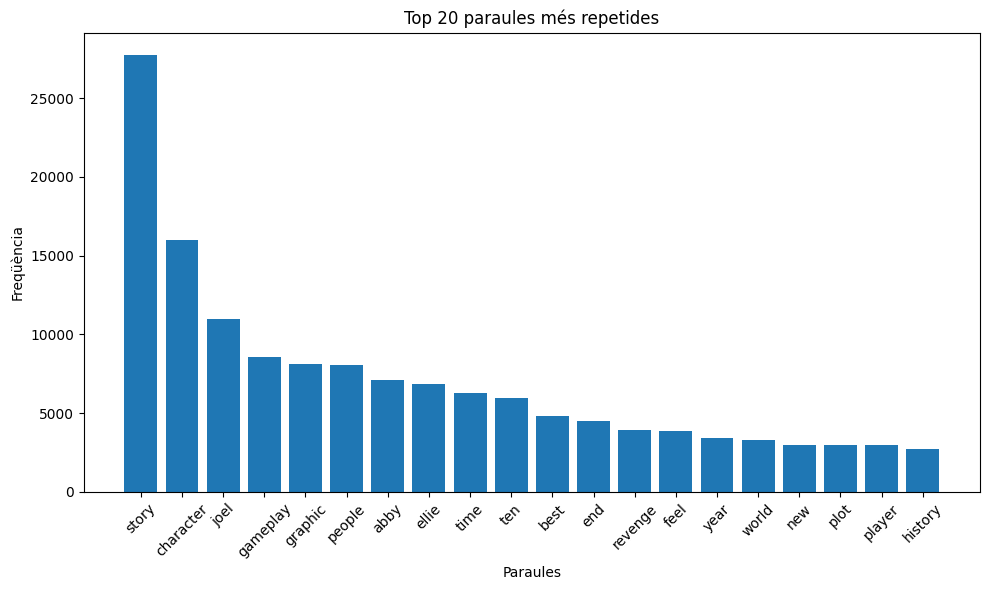

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
words_freq = {}

reviews = english_df['review']
vec = CountVectorizer().fit(reviews)
bag_of_words = vec.transform(reviews)
sum_words = bag_of_words.sum(axis=0)

# Calculate word frequencies and store them in words_freq dictionary
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Plot the word frequencies for the current score group
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in words_freq[:20]], [word[1] for word in words_freq[:20]])
plt.xlabel('Paraules')
plt.ylabel('Freqüència')
plt.title(f'Top 20 paraules més repetides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Remove neutral words

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def filter_sentiment_words(text):
    sia = SentimentIntensityAnalyzer()
    words = text.split()
    filtered_words = []

    for word in words:
        score = sia.polarity_scores(word)['compound']
        if score >= 0.05:
            filtered_words.append(word)
        elif score <= -0.05:
            filtered_words.append(word)

    filtered_text = ' '.join(filtered_words)
    return filtered_text

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [66]:
english_df['review'] = english_df['review'].apply(filter_sentiment_words)

KeyboardInterrupt: 

## Dividir los datos segun la nota

# Vectorizar los datos (Bag of words) y mostar los resultados (Word Cloud)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.colors

analyzer = SentimentIntensityAnalyzer()

# Función para asignar colores según el sentimiento de la palabra
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    sentiment_score = analyzer.polarity_scores(word)['compound']
    cmap = plt.cm.get_cmap('Spectral')
    normalized_sentiment_score = (sentiment_score + 1) / 2
    rgba_color = cmap(normalized_sentiment_score)
    hex_color = matplotlib.colors.rgb2hex(rgba_color)
    return hex_color

words_freq = {}

rows = 4
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))


for score in range(11):
    i = score // cols
    j = score % cols

    group_by_score = english_df[english_df['score'] == score]
    reviews = group_by_score['review']

    vec = CountVectorizer().fit(reviews)
    bag_of_words = vec.transform(reviews)
    sum_words = bag_of_words.sum(axis=0)

    words_freq[score] = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq[score] = dict(words_freq[score][:50])

    wordcloud = WordCloud(width=200, height=200, background_color='white', color_func=color_func).generate_from_frequencies(words_freq[score])

    ax = axes[i, j]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Score {score}')
    ax.axis('off')

axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()
